# Haciendo búsquedas con Tweepy
Primero agrego los tokens(lo que se necesita para loguearse) para que utilice una app de Twitter para realizar las busquedas

In [76]:

# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key = "cf6yoFiRnumb8YCgAc7i2890Z" # Use your own key. To get a key https://apps.twitter.com/
consumer_secret = "V4cP4UqqoYjiyxV8gsK9n91Bztg4qCowhFGLcjngTYBX6BfbmO"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)

api = tweepy.API(auth)



## Hago una búsqueda incluyendo una ubicación a partir de latitud, longitud y un radio

In [77]:
results = api.search(count=100,geocode="-34.5916734896,-58.3918617027,100mi")

## Hago el siguiente experimento:
Hago un tweet con mi cuenta de twitter con una palabra rara (para que solo encuentre mi tweet)
    - En el primer experimento, no activo la ubicacion. Resultado: no la encuentra
    - En el segundo experimento, activo la ubicacion y LO ENCUENTRA en el radio especificado.
Habría que investigar más pero por lo pronto pareceria ser, que solo cuando una activa la localizacion se pueden encontrar esos tweets.

In [89]:
sin_geo = api.search(q="asdqasdqasdq",count=100)#,geocode="-34.5916734896,-58.3918617027,100mi")
print "Hay " + str(len(sin_geo)) + " tweets hay con el termino asdqasdqasdq sin ver lo localizacion"

# con el geocode no vio el tweet (no puse la ubicacion)
con_geo = api.search(q="asdqasdqasdq",count=100,geocode="-34.5916734896,-58.3918617027,100mi")

print "Pero sólo hay " + str(len(con_geo)) + "tweets hay con el termino asdqasdqasdq" + "teniendo en cuenta la localizacion"
print "El texto del tweet con la localizacion: " + con_geo[0].text + " twitteado por " + con_geo[0].user.name

Hay 2 tweets hay con el termino asdqasdqasdq sin ver lo localizacion
Pero sólo hay 1tweets hay con el termino asdqasdqasdqteniendo en cuenta la localizacion
El texto del tweet con la localizacion: A ver ahora asdqasdqasdq twitteado por Damian Aleman


# ¿Qué información de ubicación se muestra?
En el siguiente link la página de twitter comenta acerca de la información que https://support.twitter.com/articles/20169204#
- Toda la información de geolocalización comienza como una ubicación (latitud y longitud) enviada desde el navegador o el dispositivo. Twitter no mostrará datos de ubicación a menos que hayas activado la característica y habilitado tu dispositivo o navegador para que nos transmita tus coordenadas.
- Si has elegido agregar información de ubicación a los Tweets, la etiqueta de ubicación seleccionada se mostrará debajo del texto del Tweet. En twitter.com, puedes seleccionar una etiqueta de ubicación, por ejemplo, el nombre de una ciudad o un barrio.
- Si pulsas el marcador de ubicación mientras estás escribiendo un Tweet y activas la opción para etiquetar tu ubicación exacta, ese Tweet incluirá tanto la etiqueta de ubicación que elijas como la ubicación exacta de tu dispositivo (latitud y longitud), que se puede encontrar a través de la API. Es posible que la ubicación exacta sea más específica que la etiqueta de ubicación que selecciones.  Nota: Actualmente, la opción de compartir tu ubicación exacta solo está disponible en las versiones más recientes de Twitter para iOS (6.26 o posterior) y Twitter para Android (5.55 o posterior). 
- Si twitteas desde una versión anterior de Twitter para iOS o Twitter para Android, cada Tweet que geolocalices incluirá tanto una etiqueta de ubicación (que se mostrará junto con tu Tweet) y la ubicación exacta de tu dispositivo (que se puede encontrar a través de la API). 
- Los desarrolladores de aplicaciones deben indicar con claridad si el Tweet incluirá tus coordenadas exactas o solo el lugar. Si twitteas desde una aplicación de terceros o un dispositivo móvil, debe indicarse con claridad el tipo de datos que se incluirán en tu Tweet. 


# Muestro información que puedo sacar de cada tweet

In [79]:
def print_tweet(tweet):
    print "@%s - %s (%s)" % (tweet.user.screen_name, tweet.user.name, tweet.created_at)
    print tweet.text

print "Bajó " + str(len(results)) + " tweets" 
tweet=results[3]
print_tweet(tweet)


#print dir(tweet)
#print (tweet.source)
#print tweet.id_str
#print tweet.entities

#print results[0]


tot = 0
places = [ tweet.place  for tweet in results if tweet.place != None]
#print(places)
print len(places)
for place in places:
    print place.country,place.full_name, place.place_type 


Bajó 100 tweets
@ThomasAle4 - Tomy (2016-11-16 23:42:18)
RT @Kevinlandriel1: @maticazaniga olvidate cachoooo se va la mejor promo del osso y el 17 D explotamos sutna wachooo😎😎😎😎
12
Argentina Chivilcoy, Argentina city
Argentina Ciudad Autónoma de Buenos Aires, Argentina city
Argentina Ciudad Autónoma de Buenos Aires, Argentina city
Argentina Berazategui, Argentina city
Argentina Berazategui, Argentina city
Argentina Lanús Oeste, Argentina city
Argentina Caseros, Argentina city
Argentina Ciudad Autónoma de Buenos Aires, Argentina city
Argentina Chivilcoy, Argentina city
Argentina La Plata, Argentina city
Argentina Vicente López, Argentina city
Argentina Ciudad Autónoma de Buenos Aires, Argentina city


In [80]:
results = []
search = "liguista"
for tweet in tweepy.Cursor(api.search, q=search).items(100):
    results.append(tweet)

print search + " aparece " + str(len(results)) + " veces"
tweet=results[3]
print_tweet(tweet)

liguista aparece 100 veces
@PatricioCedeo7 - Patricio Cedeño (2016-11-16 14:29:00)
Buen dia a todos los liguista de corazon y a los que no lo son igual


## ¿De dónde escribieron los tweets encontrados?

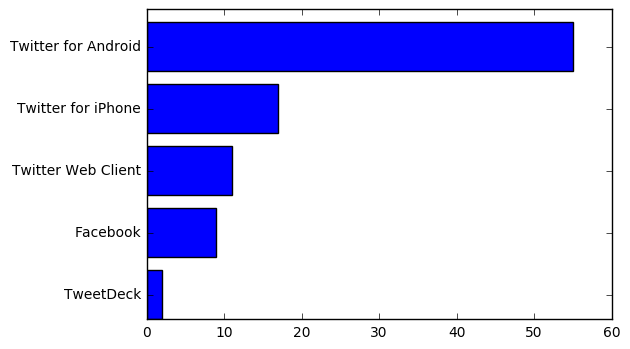

In [81]:
id_list = [tweet.id for tweet in results]
data_set = pd.DataFrame(id_list, columns=["id"])
    
data_set["source"] = [tweet.source for tweet in results]

sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(xrange(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()
